In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df = pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
df.drop('CustomerID',axis=1,inplace=True)

In [43]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [44]:
gender = pd.get_dummies(df['Gender'],drop_first=True)
df = pd.concat([df,gender],axis=1)

In [45]:
df.drop('Gender',axis=1,inplace=True)

In [46]:
df.shape

(200, 4)

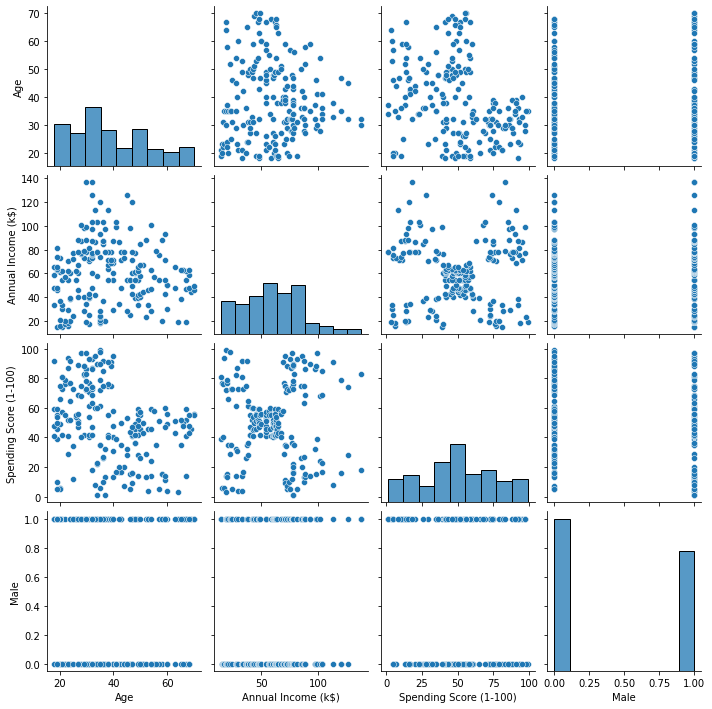

In [47]:
sns.pairplot(data=df)

<AxesSubplot:>

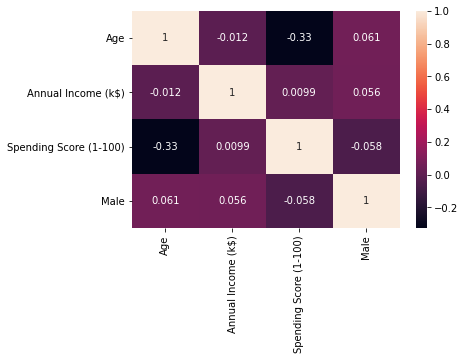

In [48]:
sns.heatmap(df.corr(),annot=True)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
scaled_data = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [51]:
scaled_data

,Age,Annual Income (k$),Spending Score (1-100),Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


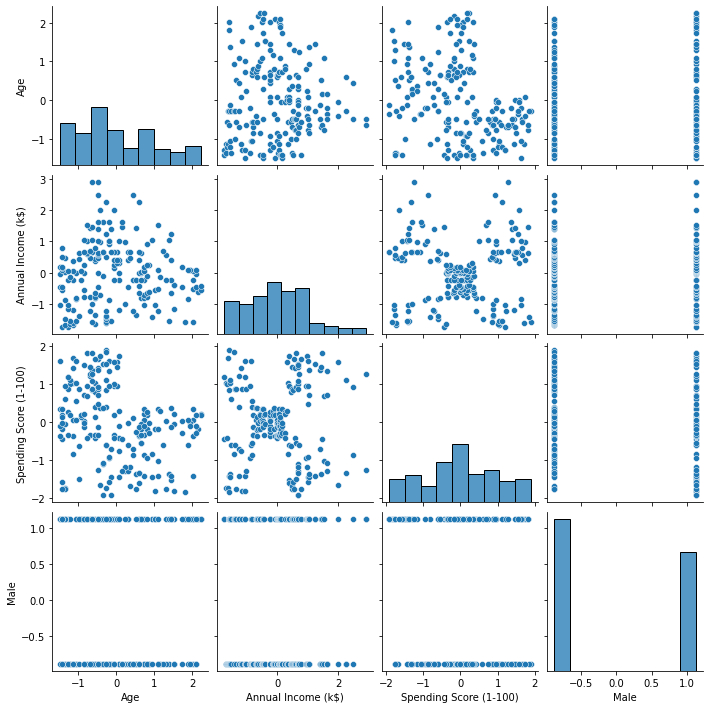

In [52]:
sns.pairplot(data=scaled_data)

# using K means Clusting

In [53]:
from sklearn.cluster import KMeans

In [54]:
noise = []
cluster_range = range(1,30)
for i in cluster_range:
    model = KMeans(n_clusters=i)
    model.fit(scaled_data)
    noise.append(model.inertia_)

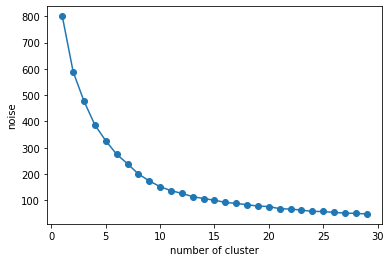

In [55]:
plt.plot(cluster_range,noise,marker='o')
plt.xlabel('number of cluster')
plt.ylabel('noise')
plt.show()

In [56]:
model = KMeans(n_clusters=10)
model.fit(scaled_data)
Y = model.predict(scaled_data)

In [57]:
Y

array([9, 9, 3, 0, 3, 0, 3, 0, 4, 0, 4, 0, 2, 0, 4, 9, 3, 9, 4, 0, 9, 9,
       2, 9, 2, 9, 2, 9, 2, 0, 4, 0, 4, 9, 2, 0, 2, 0, 3, 0, 2, 9, 4, 3,
       2, 0, 2, 3, 3, 3, 2, 9, 3, 4, 2, 4, 2, 4, 3, 4, 4, 1, 2, 2, 4, 1,
       2, 2, 1, 3, 4, 2, 2, 2, 4, 1, 2, 1, 3, 2, 4, 1, 4, 2, 3, 4, 2, 3,
       3, 2, 2, 1, 4, 3, 3, 1, 2, 3, 4, 1, 3, 2, 4, 1, 4, 3, 2, 4, 4, 4,
       4, 3, 3, 1, 3, 3, 2, 2, 2, 2, 1, 3, 5, 6, 3, 5, 8, 6, 4, 6, 8, 6,
       3, 5, 8, 5, 7, 6, 8, 5, 7, 6, 3, 5, 8, 6, 8, 5, 7, 6, 8, 6, 7, 5,
       7, 5, 8, 5, 8, 5, 7, 5, 8, 5, 8, 5, 8, 5, 7, 6, 8, 6, 8, 6, 7, 5,
       8, 6, 8, 6, 7, 5, 8, 5, 7, 6, 7, 6, 7, 5, 7, 5, 8, 5, 7, 5, 7, 6,
       8, 6], dtype=int32)

In [58]:
model.cluster_centers_

array([[-0.96084556, -1.33087991,  1.17778643, -0.88640526],
       [-1.029852  , -0.15814867,  0.08605446,  1.12815215],
       [ 0.98505218, -0.49907107, -0.30892551, -0.88640526],
       [-0.76876973, -0.37148068, -0.29825668, -0.88640526],
       [ 1.37699013, -0.49354486, -0.44055282,  1.12815215],
       [-0.45245636,  0.94327069,  1.17982252, -0.88640526],
       [-0.39989994,  1.01344075,  1.26040667,  1.12815215],
       [ 0.41265847,  1.21277   , -1.11029664, -0.88640526],
       [-0.02700694,  0.96701244, -1.39716754,  1.12815215],
       [-0.92220196, -1.31595469,  0.74602099,  1.12815215]])

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=42)
Xpca = pd.DataFrame(pca.fit_transform(scaled_data),columns=['pca1','pca2'])
Xpca

,pca1,pca2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


In [72]:
pca.explained_variance_ratio_.cumsum()[1]

0.5992069019819848

In [63]:
Xpca_Centers = pca.transform(model.cluster_centers_)

In [64]:
Xpca_Centers

array([[-1.6696024 , -1.35294268],
       [-0.50225828,  0.70186536],
       [ 0.68517405, -1.07161389],
       [-0.52938515, -0.79102095],
       [ 1.51718602,  0.14128667],
       [-1.33511175,  0.33485089],
       [-0.88272588,  1.65431318],
       [ 0.83149037,  0.21501655],
       [ 1.19961046,  1.30582744],
       [-0.874508  , -0.12719417]])

In [77]:
Xpca_Centers[:,0]

array([-1.6696024 , -0.50225828,  0.68517405, -0.52938515,  1.51718602,
       -1.33511175, -0.88272588,  0.83149037,  1.19961046, -0.874508  ])

In [65]:
Xpca['Cluster'] = Y

In [66]:
Xpca

,pca1,pca2,Cluster
0,-0.406383,-0.520714,9
1,-1.427673,-0.367310,9
2,0.050761,-1.894068,3
3,-1.694513,-1.631908,0
4,-0.313108,-1.810483,3
...,...,...,...
195,-1.179572,1.324568,5
196,0.672751,1.221061,7
197,-0.723719,2.765010,6
198,0.767096,2.861930,8


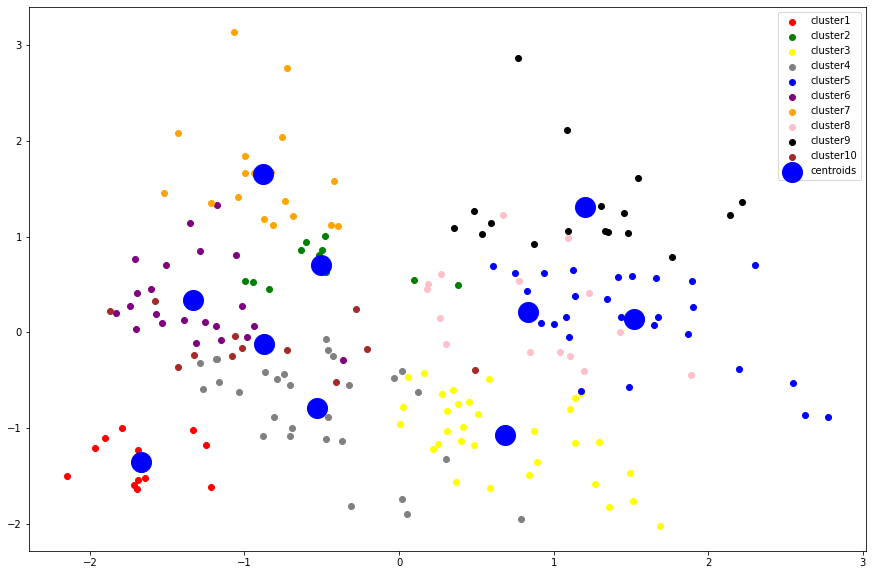

In [78]:
plt.figure(figsize=(15,10))
plt.scatter(Xpca[Xpca['Cluster'] == 0].loc[:,'pca1'],Xpca[Xpca['Cluster'] == 0].loc[:,'pca2'],color='red',label='cluster1')
plt.scatter(Xpca[Xpca['Cluster'] == 1].loc[:,'pca1'],Xpca[Xpca['Cluster'] == 1].loc[:,'pca2'],color='green',label='cluster2')
plt.scatter(Xpca[Xpca['Cluster'] == 2].loc[:,'pca1'],Xpca[Xpca['Cluster'] == 2].loc[:,'pca2'],color='yellow',label='cluster3')
plt.scatter(Xpca[Xpca['Cluster'] == 3].loc[:,'pca1'],Xpca[Xpca['Cluster'] == 3].loc[:,'pca2'],color='grey',label='cluster4')
plt.scatter(Xpca[Xpca['Cluster'] == 4].loc[:,'pca1'],Xpca[Xpca['Cluster'] == 4].loc[:,'pca2'],color='blue',label='cluster5')
plt.scatter(Xpca[Xpca['Cluster'] == 5].loc[:,'pca1'],Xpca[Xpca['Cluster'] == 5].loc[:,'pca2'],color='purple',label='cluster6')
plt.scatter(Xpca[Xpca['Cluster'] == 6].loc[:,'pca1'],Xpca[Xpca['Cluster'] == 6].loc[:,'pca2'],color='orange',label='cluster7')
plt.scatter(Xpca[Xpca['Cluster'] == 7].loc[:,'pca1'],Xpca[Xpca['Cluster'] == 7].loc[:,'pca2'],color='pink',label='cluster8')
plt.scatter(Xpca[Xpca['Cluster'] == 8].loc[:,'pca1'],Xpca[Xpca['Cluster'] == 8].loc[:,'pca2'],color='black',label='cluster9')
plt.scatter(Xpca[Xpca['Cluster'] == 9].loc[:,'pca1'],Xpca[Xpca['Cluster'] == 9].loc[:,'pca2'],color='brown',label='cluster10')
plt.scatter(Xpca_Centers[:,0],Xpca_Centers[:,1],s=400,c='blue',label='centroids')
plt.legend()
plt.show()

In [79]:
from collections import Counter
Counter(Y)

Counter({9: 12, 3: 29, 0: 13, 4: 27, 2: 33, 1: 12, 5: 22, 6: 18, 8: 19, 7: 15})